In [1]:
pip install scvelo

  Obtaining dependency information for scvelo from https://files.pythonhosted.org/packages/c4/ad/fbc84bd996bbb46ebe3925dcf5b9f8df9000243f9a25e6f230f35fcacb4e/scvelo-0.3.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.0 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for scvi-tools>=0.20.1 from https://files.pythonhosted.org/packages/b7/79/c9e22e42b0a6d6b65e3291851641783379b04f541054ea1eed8486f57aa1/scvi_tools-1.0.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for flax from https://files.pythonhosted.org/packages/95/a6/5017385e65dee7609250f1dc20c3874289afdf57212e65b7f26411c4313b/flax-0.7.5-py3-none-any.whl.metadata
  Obtaining dependency information for jax>=0.4.4 from https://files.pythonhosted.org/packages/28/d0/edf653ea02628f2130ea2557f96d02b264768a2f54d22a9c002c7119cb1d/jax-0.4.23-py3-none-any.w

In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scvelo as scv


In [3]:
sc.set_figure_params(facecolor='white', figsize=(8,8))
sc.settings.verbosity = 3

In [4]:
adata = sc.datasets.visium_sge(sample_id="V1_Mouse_Brain_Sagittal_Anterior")

  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /Users/kwangwooko/Desktop/Coding_practice/sp_mBrain_sagittal/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5
 (0:00:02)


In [5]:
adata.var_names_make_unique()

In [6]:
adata

AnnData object with n_obs × n_vars = 2695 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
# QC and Preprocessing
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)


In [8]:
adata.var.head(5)

gene_ids    feature_types genome     mt  n_cells_by_counts  \
Xkr4     ENSMUSG00000051951  Gene Expression   mm10  False                 66   
Gm1992   ENSMUSG00000089699  Gene Expression   mm10  False                  0   
Gm19938  ENSMUSG00000102331  Gene Expression   mm10  False                 72   
Gm37381  ENSMUSG00000102343  Gene Expression   mm10  False                  0   
Rp1      ENSMUSG00000025900  Gene Expression   mm10  False                  1   

         mean_counts  log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4        0.024861           0.024557              97.551020          67.0   
Gm1992      0.000000           0.000000             100.000000           0.0   
Gm19938     0.028571           0.028171              97.328386          77.0   
Gm37381     0.000000           0.000000             100.000000           0.0   
Rp1         0.000371           0.000371              99.962894           1.0   

         log1p_total_counts  
Xkr4               4.219508  
Gm1992             0.000000  
Gm19938            4.356709  
Gm37381            0.000000  
Rp1                0.693147

In [9]:
adata.obs.head(5)

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4462   
AAACACCAATAACTGC-1          1         59         19               8126   
AAACAGAGCGACTCCT-1          1         14         94               6526   
AAACAGCTTTCAGAAG-1          1         43          9               8190   
AAACAGGGTCTATATT-1          1         47         13               8090   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.403576       13991.0            9.546241   
AAACACCAATAACTGC-1                 9.002947       39797.0           10.591572   
AAACAGAGCGACTCCT-1                 8.783703       29951.0           10.307351   
AAACAGCTTTCAGAAG-1                 9.010791       42333.0           10.653346   
AAACAGGGTCTATATT-1                 8.998508       35700.0           10.482934   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   25.523551                    31.748981   
AAACACCAATAACTGC-1                   20.760359                    26.132623   
AAACAGAGCGACTCCT-1                   28.423091                    33.611566   
AAACAGCTTTCAGAAG-1                   15.659178                    21.760801   
AAACAGGGTCTATATT-1                   13.196078                    18.985994   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    40.132943                    54.113359   
AAACACCAATAACTGC-1                    33.768877                    47.144257   
AAACAGAGCGACTCCT-1                    40.749891                    53.193549   
AAACAGCTTTCAGAAG-1                    30.030945                    44.157041   
AAACAGGGTCTATATT-1                    27.165266                    40.963585   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAAGTATCTCCCA-1           1521.0               7.327781      10.871274  
AAACACCAATAACTGC-1           3977.0               8.288534       9.993216  
AAACAGAGCGACTCCT-1           4265.0               8.358432      14.239925  
AAACAGCTTTCAGAAG-1           2870.0               7.962416       6.779581  
AAACAGGGTCTATATT-1           1831.0               7.513164       5.128851

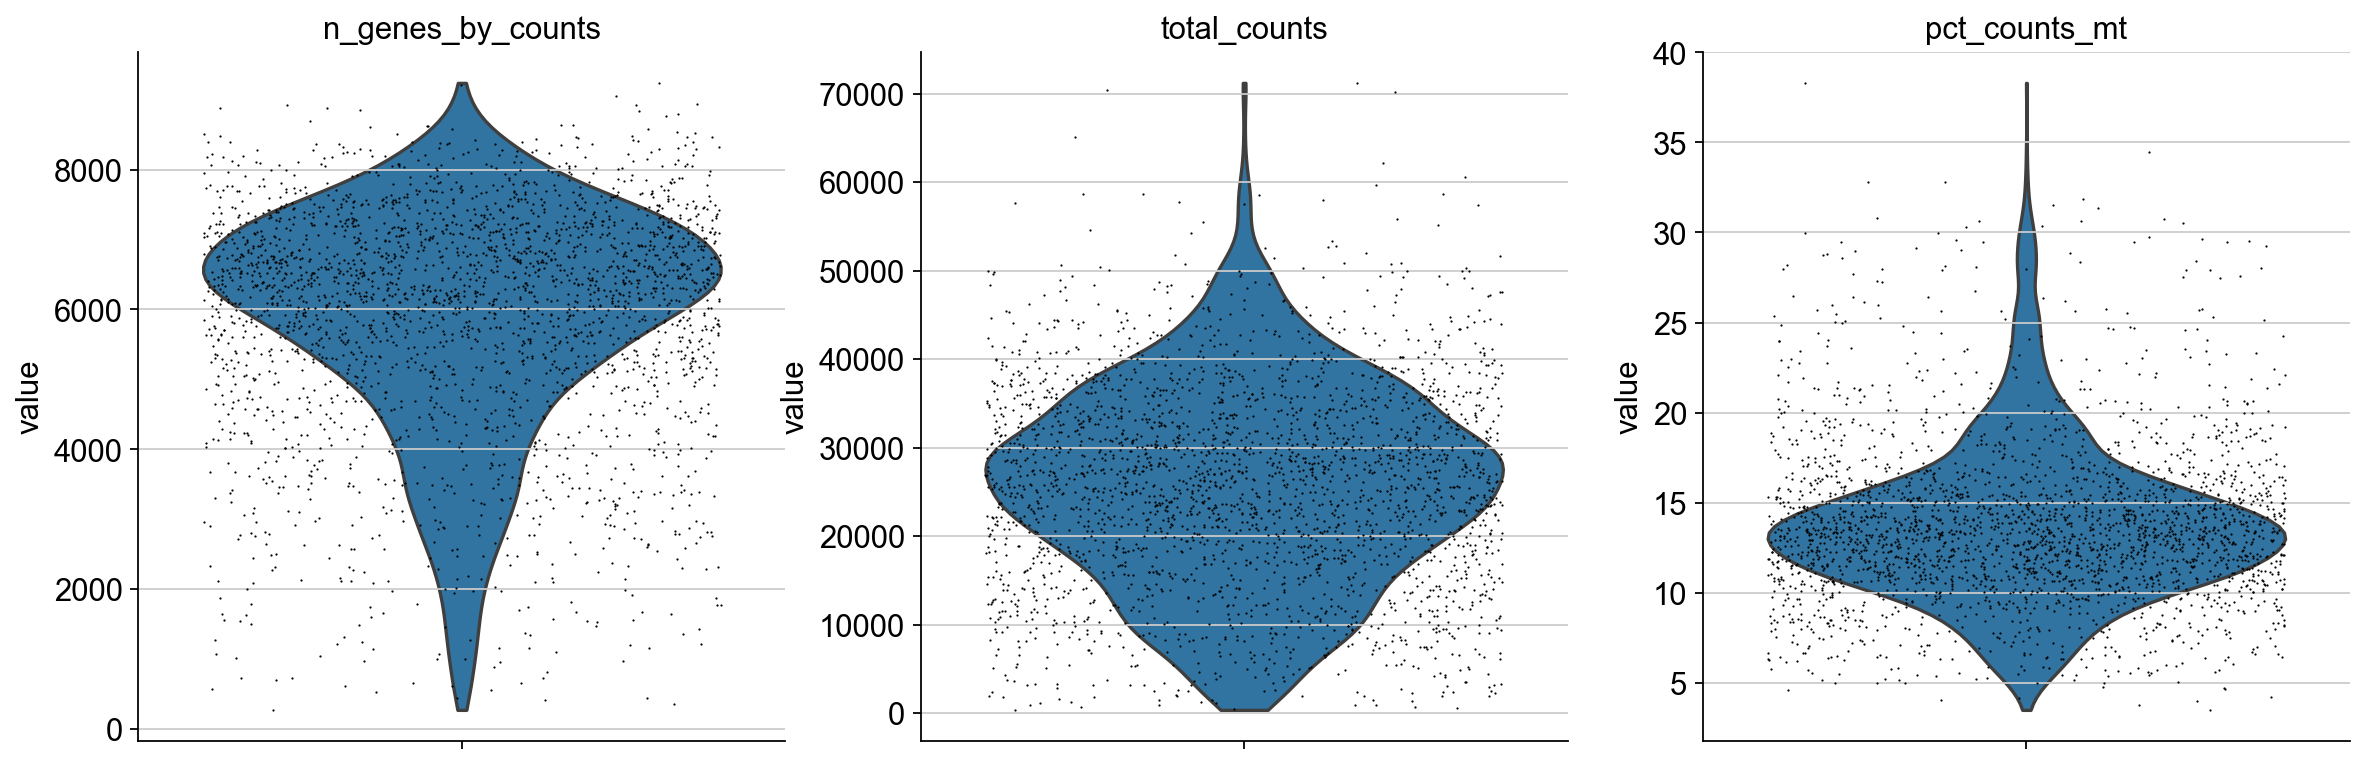

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
            jitter=0.4, multi_panel=True)

In [11]:
adata = adata[adata.obs.n_genes_by_counts>2000, :]
adata = adata[adata.obs.total_counts < 50000, :]
adata = adata[adata.obs.total_counts >5000, :]
adata = adata[adata.obs.pct_counts_mt <25,: ]
sc.pp.filter_genes(adata, min_cells =10)


filtered out 15250 genes that are detected in less than 10 cells


In [12]:
adata

AnnData object with n_obs × n_vars = 2500 × 17035
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [13]:
adata[adata.obs.array_row <50, :]

View of AnnData object with n_obs × n_vars = 1545 × 17035
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [14]:
adata.obs.array_row <50

AAACAAGTATCTCCCA-1    False
AAACACCAATAACTGC-1    False
AAACAGAGCGACTCCT-1     True
AAACAGCTTTCAGAAG-1     True
AAACAGGGTCTATATT-1     True
                      ...  
TTGTGTTTCCCGAAAG-1    False
TTGTTCAGTGTGCTAC-1     True
TTGTTGTGTGTCAAGA-1     True
TTGTTTCACATCCAGG-1    False
TTGTTTCCATACAACT-1     True
Name: array_row, Length: 2500, dtype: bool

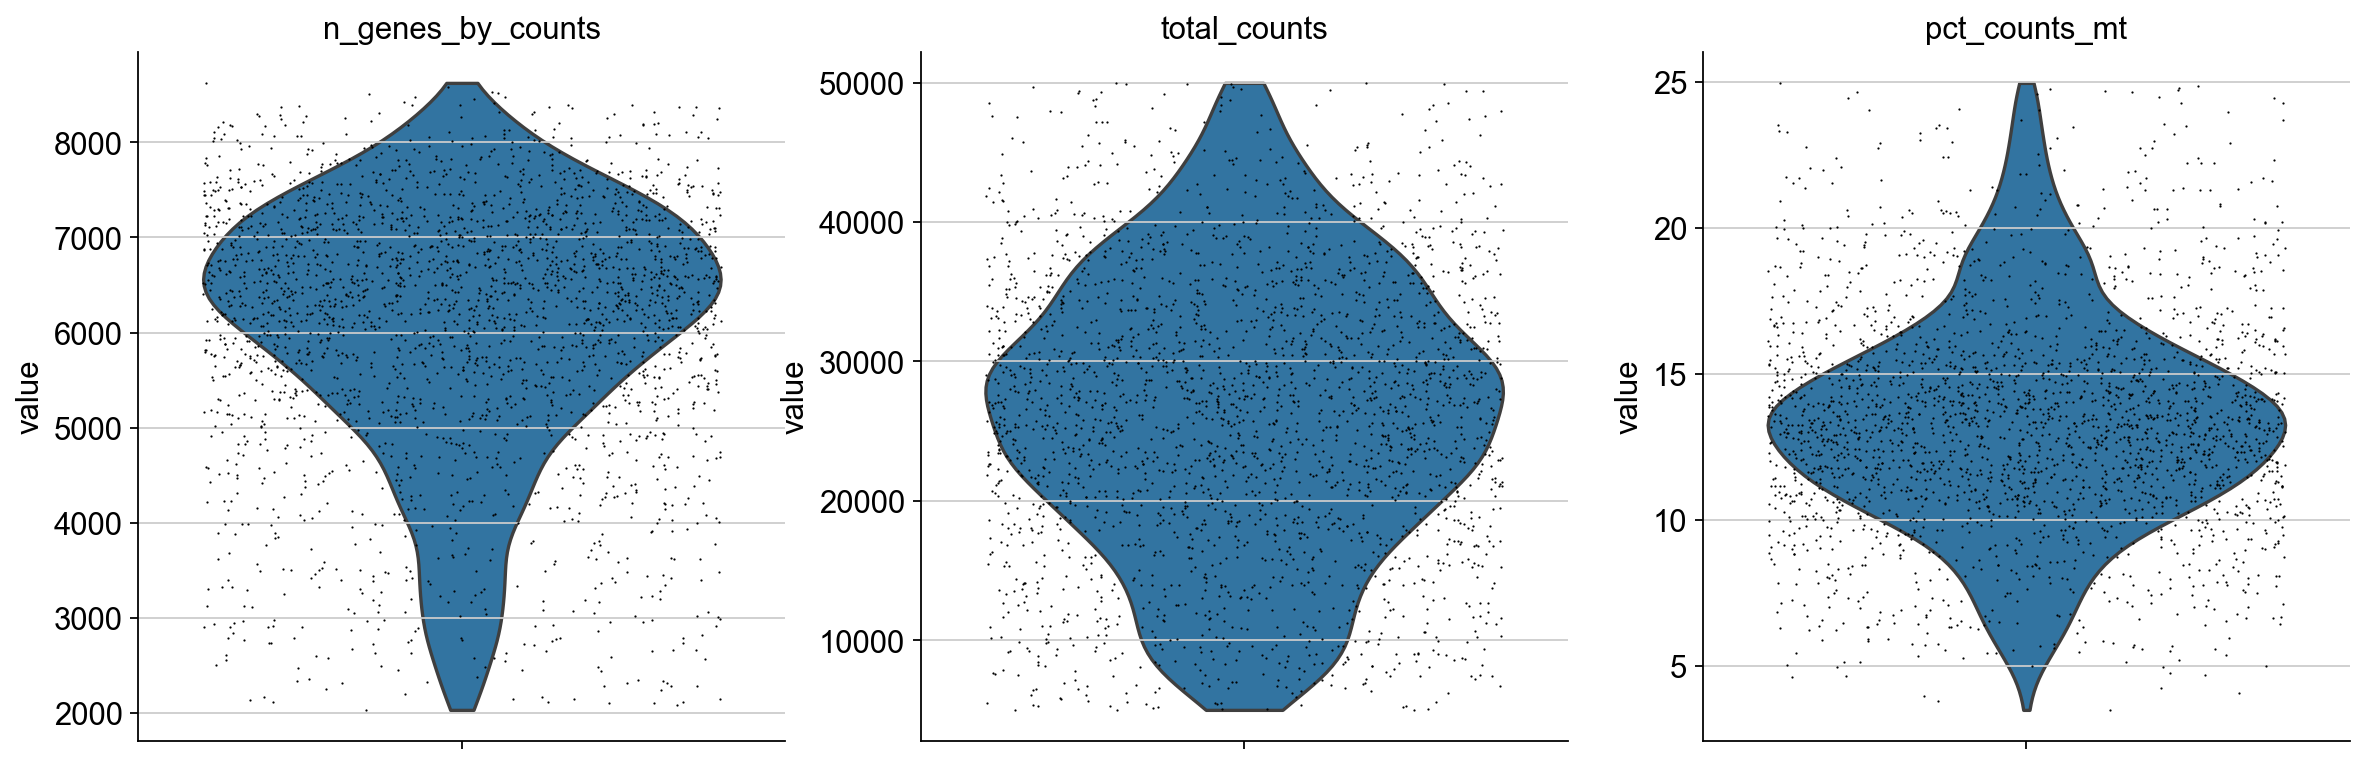

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
            jitter=0.4, multi_panel=True)

adata.obs.loc['AAACAAGTATCTCCCA-1']

In [16]:
adata.obs.loc['AAACAAGTATCTCCCA-1']

in_tissue                          1.000000
array_row                         50.000000
array_col                        102.000000
n_genes_by_counts               4462.000000
log1p_n_genes_by_counts            8.403576
total_counts                   13991.000000
log1p_total_counts                 9.546241
pct_counts_in_top_50_genes        25.523551
pct_counts_in_top_100_genes       31.748981
pct_counts_in_top_200_genes       40.132943
pct_counts_in_top_500_genes       54.113359
total_counts_mt                 1521.000000
log1p_total_counts_mt              7.327781
pct_counts_mt                     10.871274
Name: AAACAAGTATCTCCCA-1, dtype: float64

In [17]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [18]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [19]:
adata

AnnData object with n_obs × n_vars = 2500 × 17035
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg'
    obsm: 'spatial'

In [20]:
# embedding and clustering based on transcriptional similarity
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [21]:
sc.tl.leiden(adata, key_added='clusters', resolution = .2)

running Leiden clustering
    finished: found 8 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


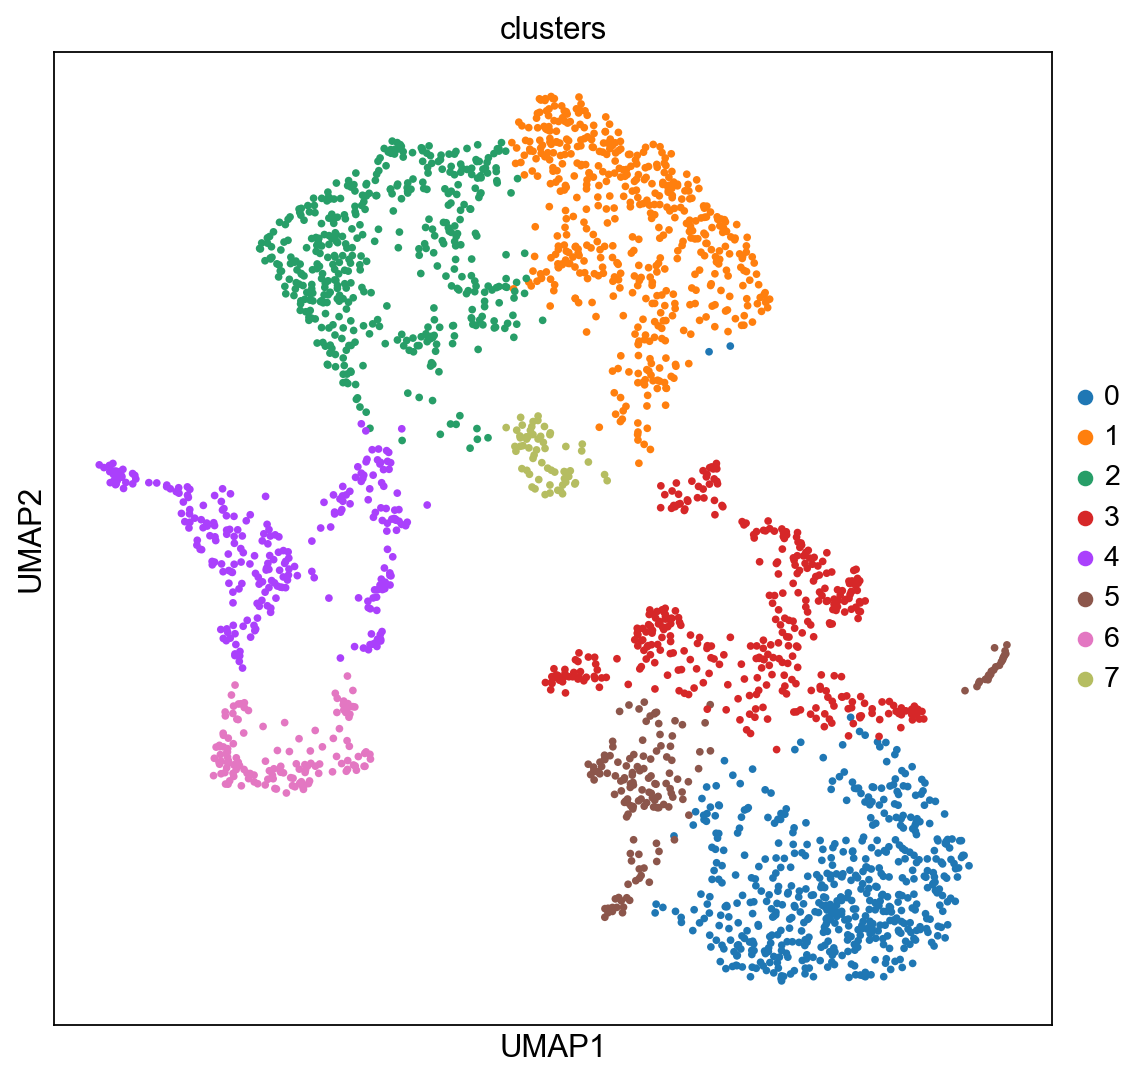

In [22]:
plt.rcParams['figure.figsize'] = (8,8) #rcParams (Runtime Configuration Parameters)
sc.pl.umap(adata, color='clusters', wspace = 0.4)

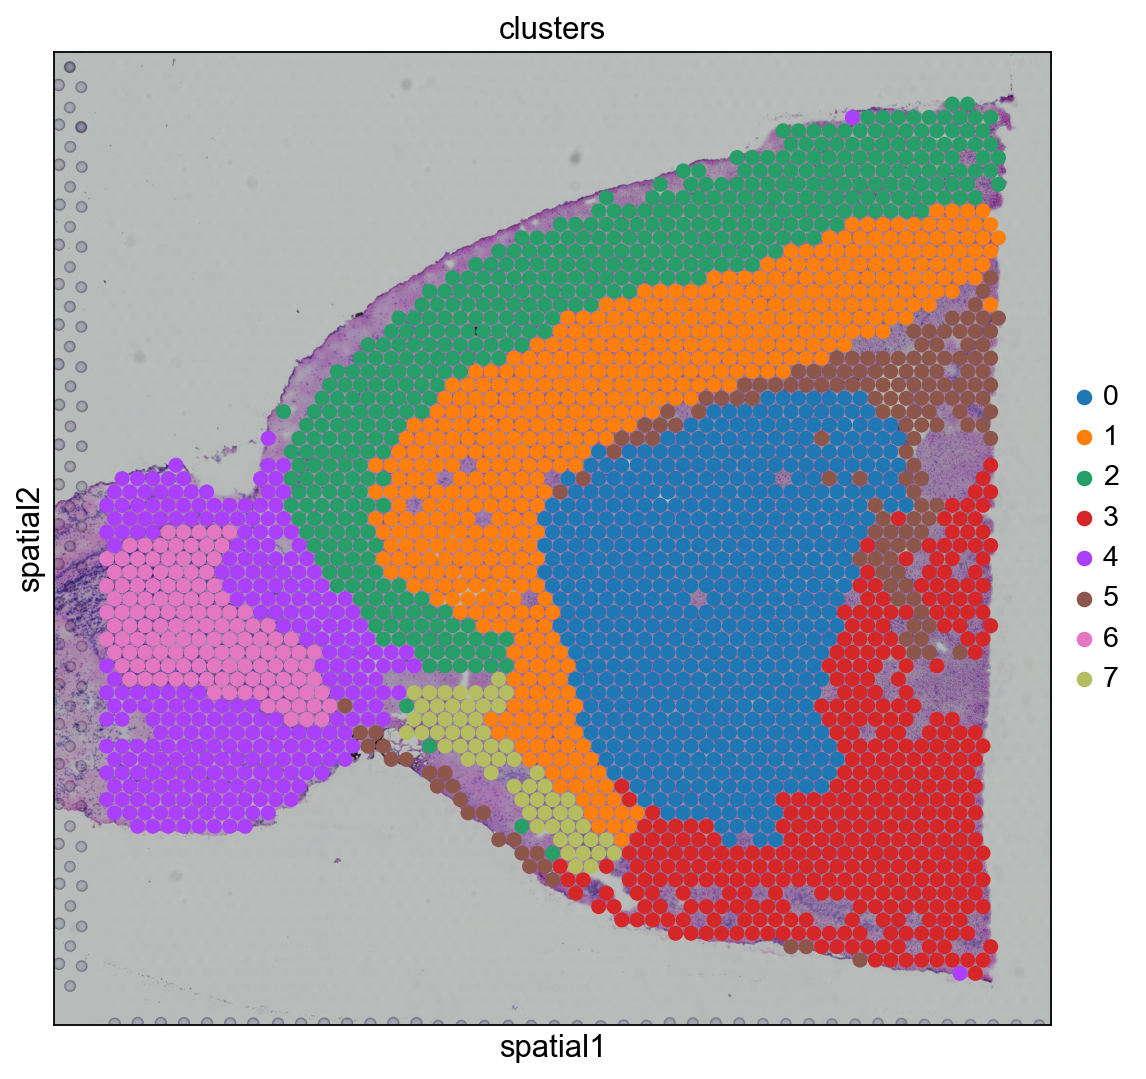

In [23]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata, img_key='hires', color='clusters', size = 1.5)

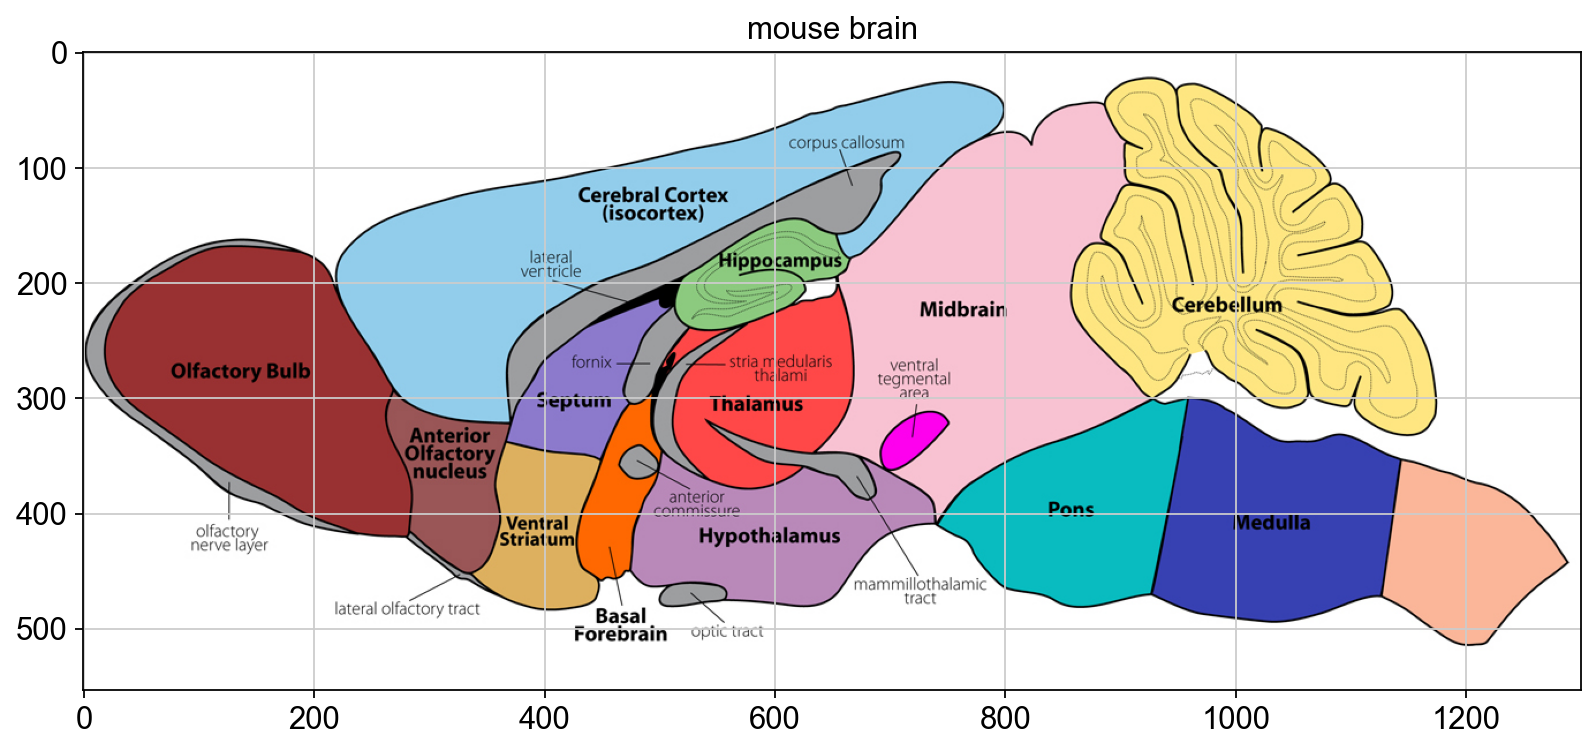

In [24]:
from matplotlib import image as mping
plt.rcParams['figure.figsize'] = (12, 30)
plt.title('mouse brain')
image = mping.imread("data/ADULT_ATLAS_09.jpg")
plt.imshow(image)
plt.show()

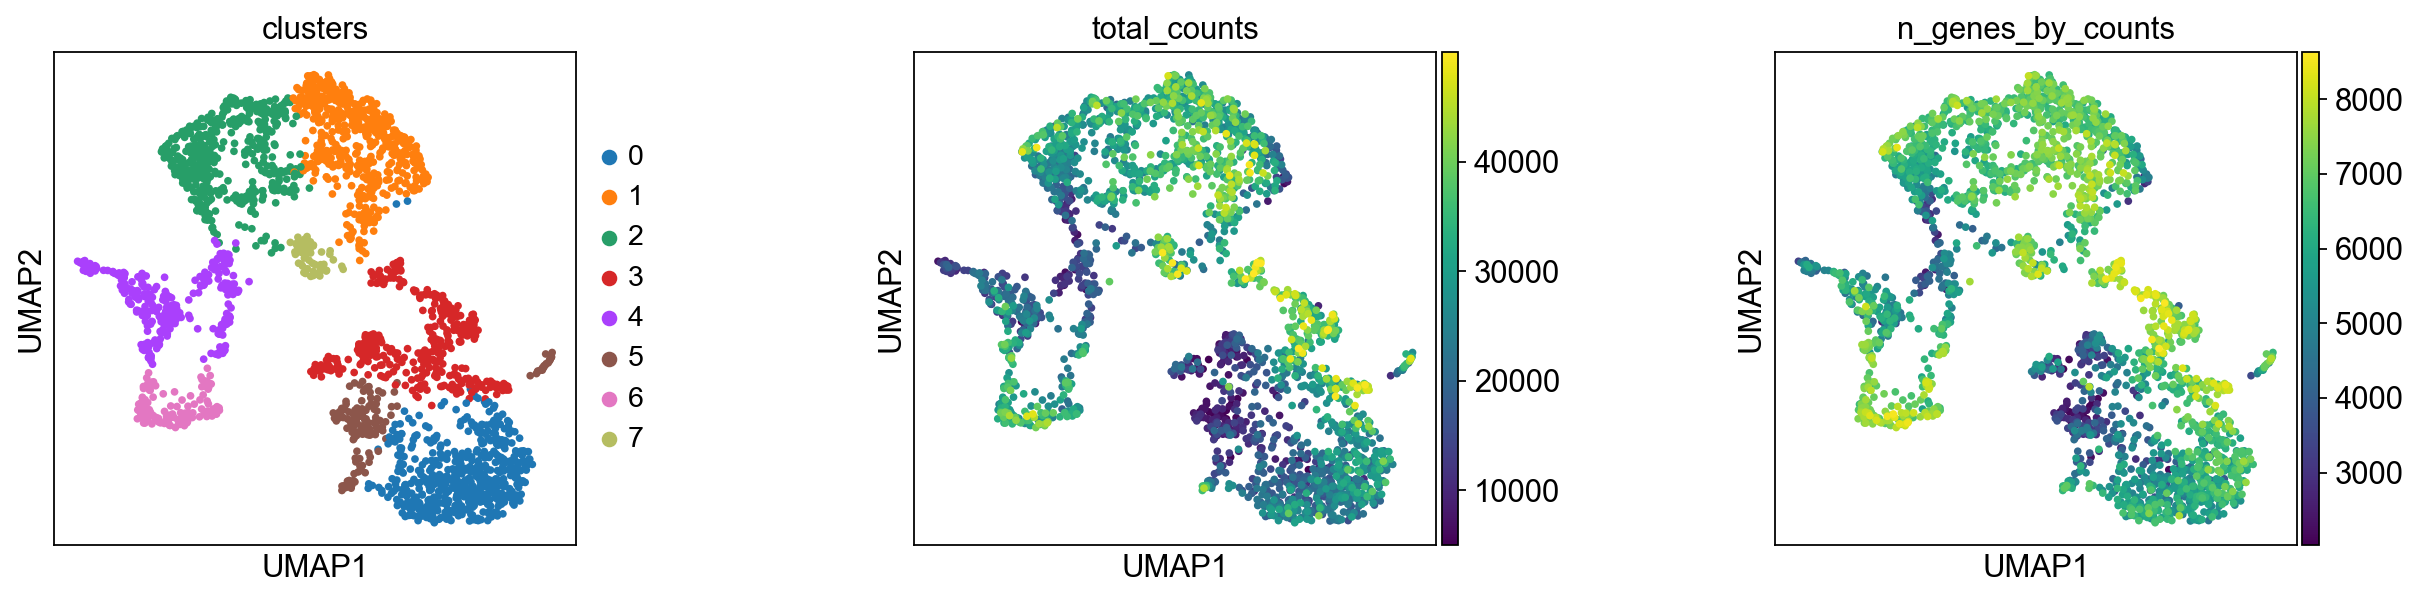

In [27]:
plt.rcParams['figure.figsize'] = (4,4)
sc.pl.umap(adata, color=['clusters', 'total_counts', 'n_genes_by_counts'], wspace=0.5)

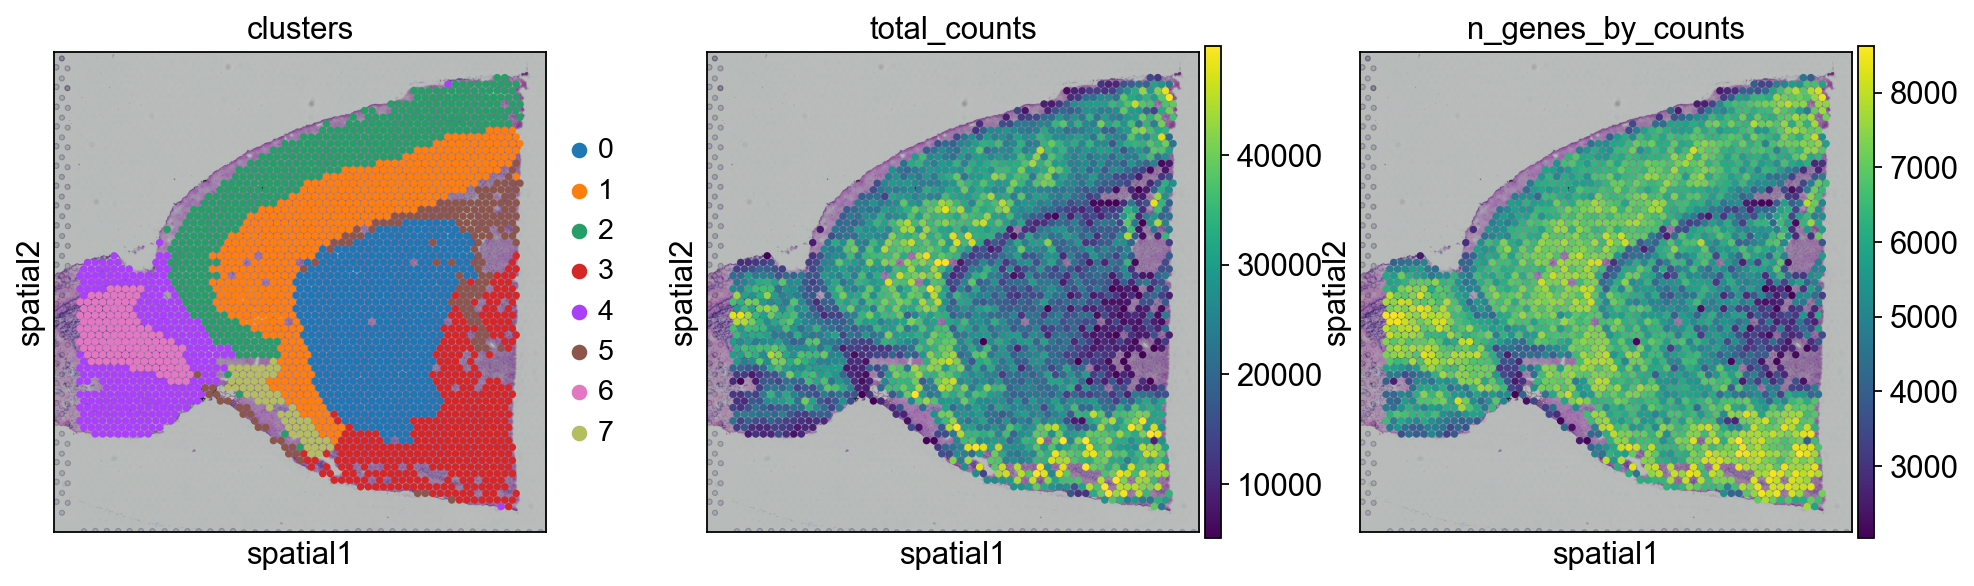

In [28]:
sc.pl.spatial(adata, img_key='hires', color=['clusters', 'total_counts', 'n_genes_by_counts'], size=1.5)

In [29]:
sc.tl.rank_genes_groups(adata, "clusters", method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:14)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`


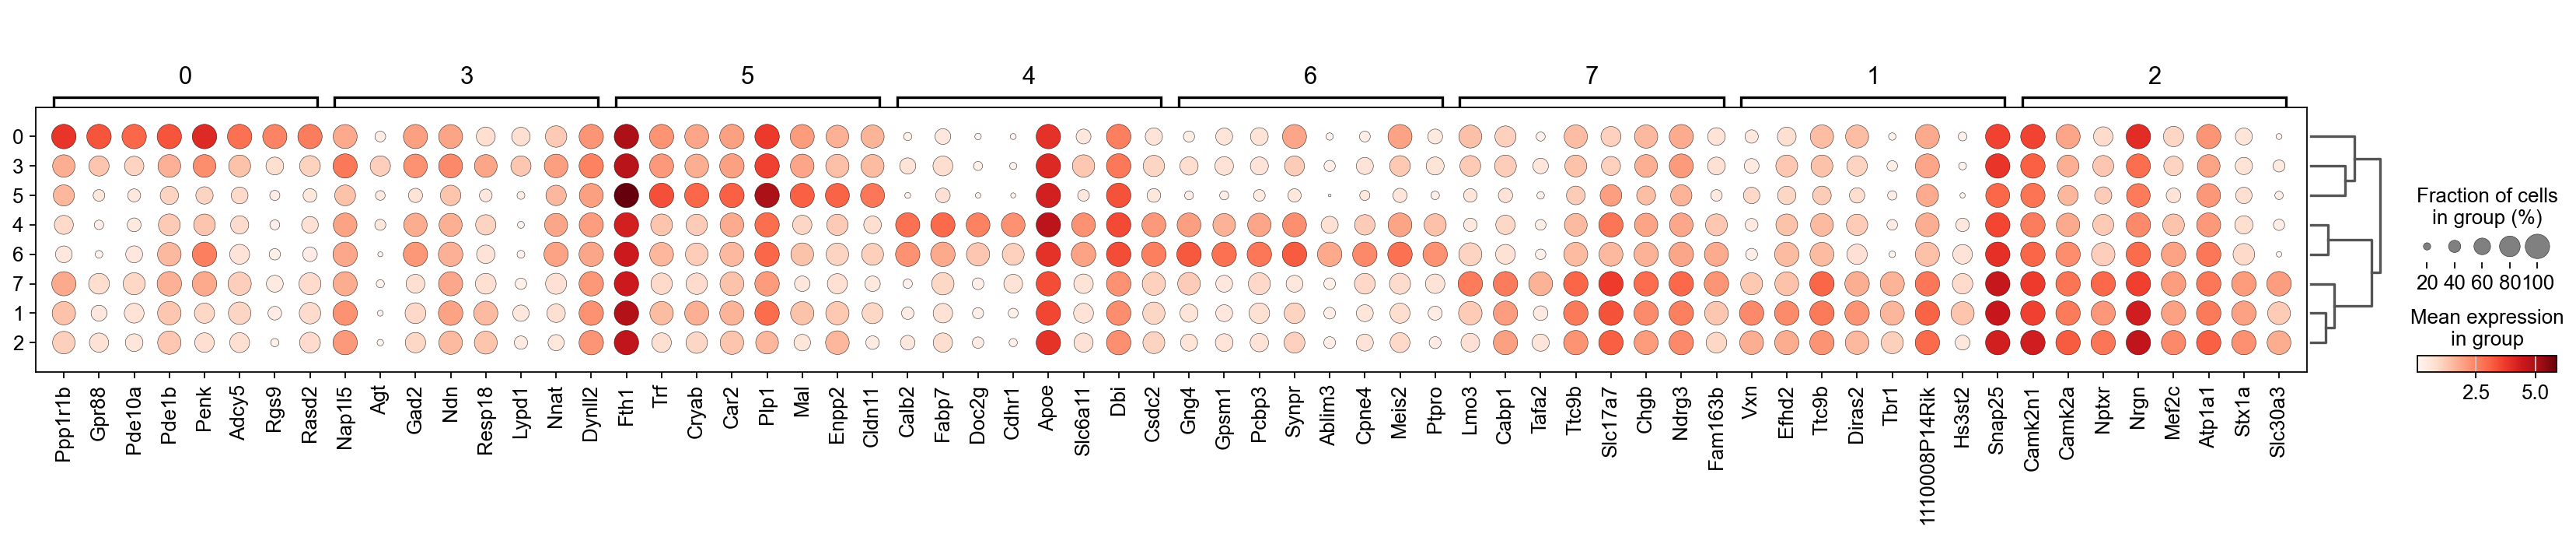

In [30]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=8)

categories: 0, 1, 2, etc.
var_group_labels: 5


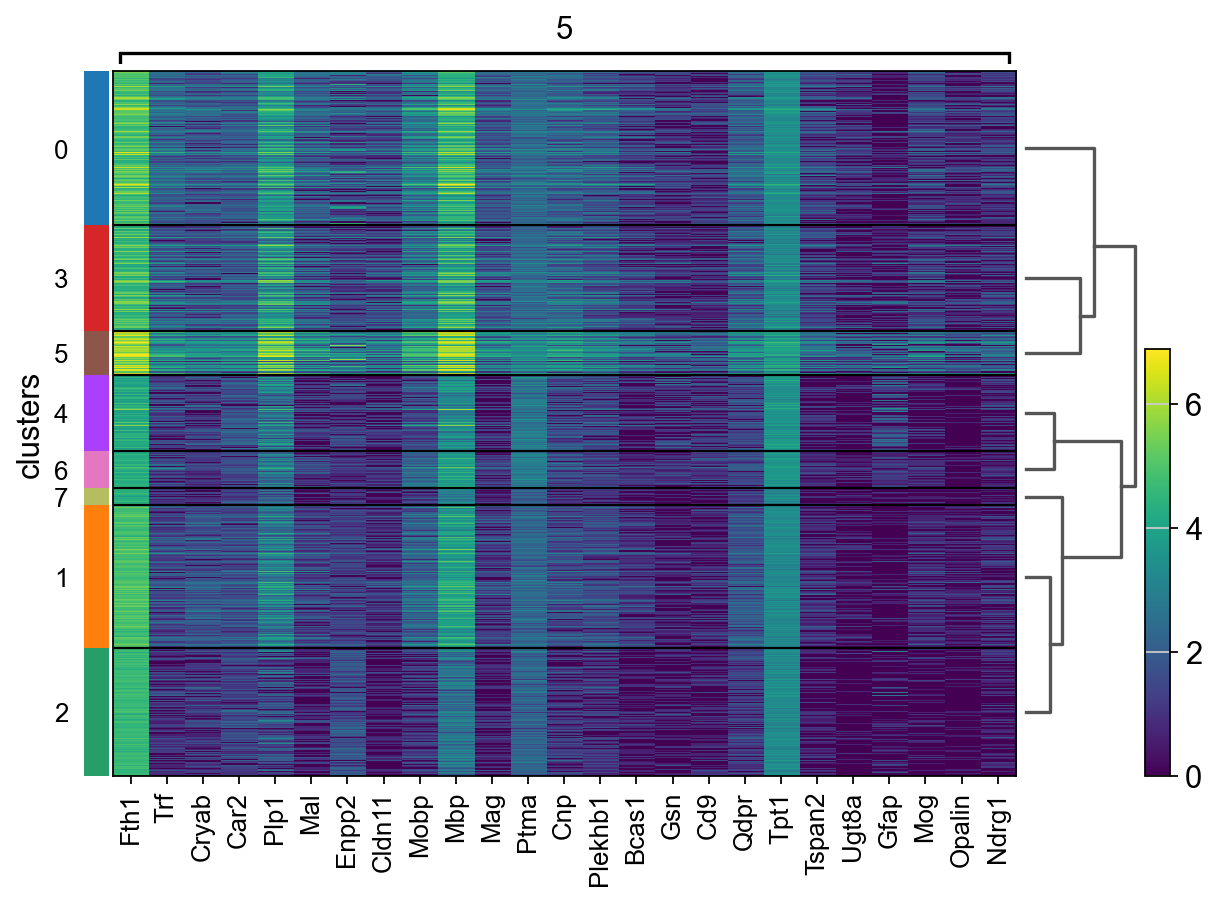

In [31]:
sc.pl.rank_genes_groups_heatmap(adata, groups='5', n_genes=25, groupby="clusters")

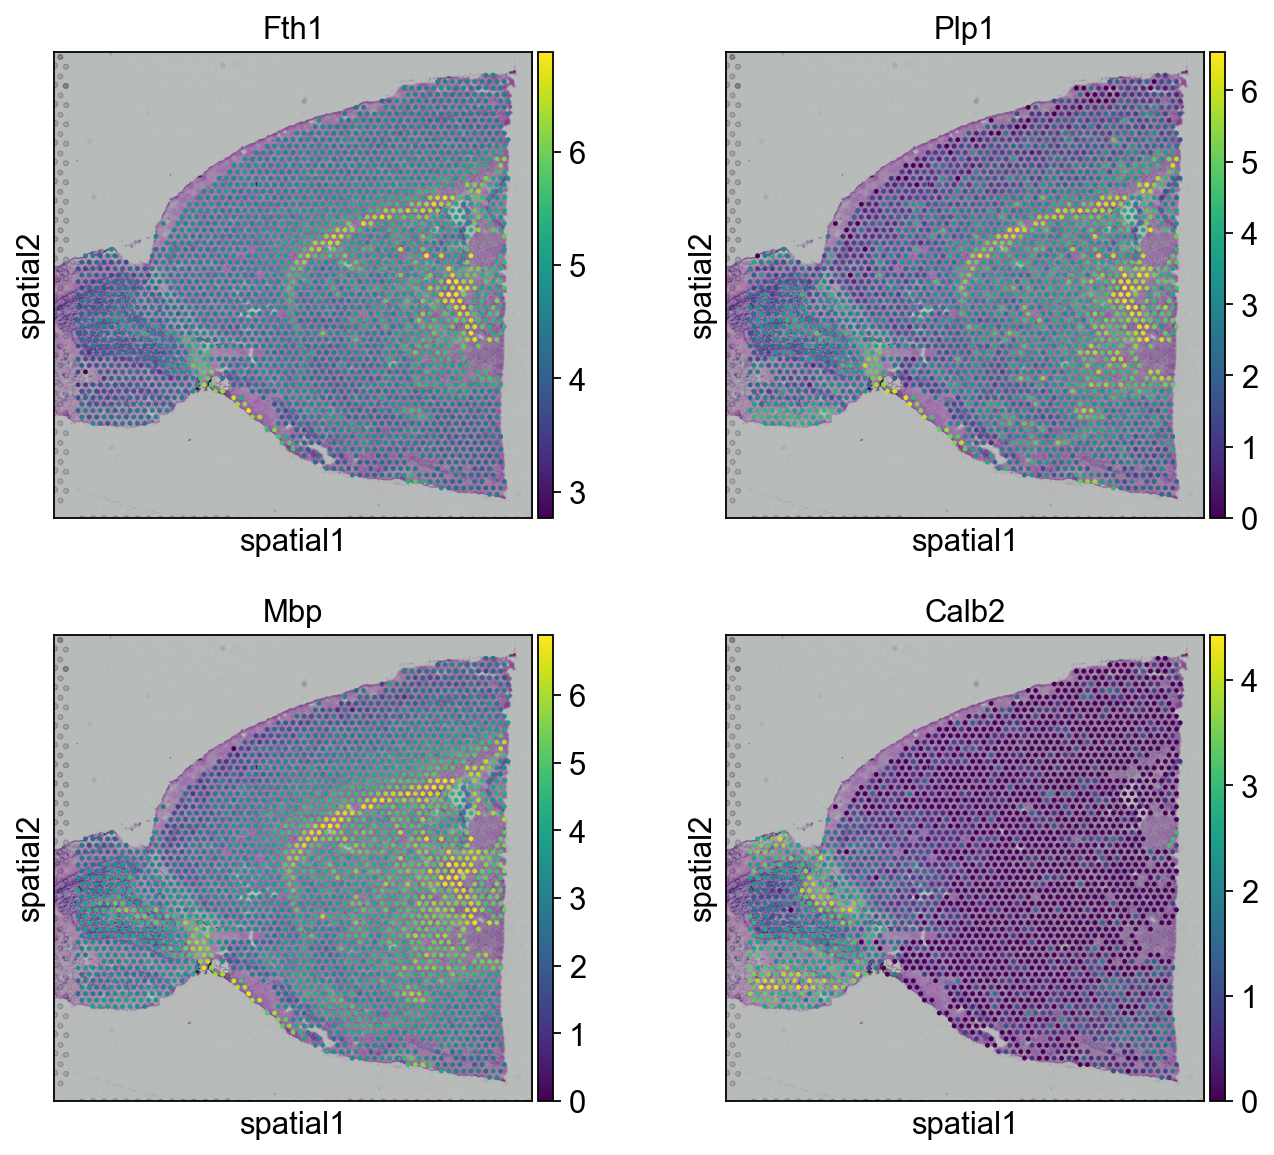

In [32]:
sc.pl.spatial(adata, img_key='hires', color = ['Fth1', 'Plp1', "Mbp", 'Calb2'], ncols=2)

In [34]:
# spatially variable genes: identifying spatial patterns of gene expression
# (a Gaussian process-based statistical framework that aims to identify spatially variable genes)

#pip install spatialde

SyntaxError: invalid syntax (2387440968.py, line 4)

In [35]:
pip install spatialde

  Preparing metadata (setup.py) ... done
  Created wheel for NaiveDE: filename=NaiveDE-1.2.0-py3-none-any.whl size=5687 sha256=aaab9c6fe228745835fdf5b34f78e4c27a2b93e3c04a24cf7906dd15aa378ae5
  Stored in directory: /Users/kwangwooko/Library/Caches/pip/wheels/5a/d9/6a/5d31ca0ef9362888a38bb5d2b7c6f15a1e5aacdfe1bc669afc
Successfully built NaiveDE
Note: you may need to restart the kernel to use updated packages.


In [36]:
# Below did not work. Because there is an error when, results = SpatialDE.run(coord, counts)
import SpatialDE

In [ ]:
# convert normalized counts and coordinates to pandas dataframe, needed for inputs to spatialDE

counts = pd.DataFrame(adata.X.todense(), columns=adata.var_names, index=adata.obs_names)
coord = pd.DataFrame(adata.obsm['spatial'], columns=['x_coord', 'y_coord'], index=adata.obs_names)
results = SpatialDE.run(coord, counts)

In [49]:
# concatenate the results with the DataFrame of annotation of variables: adata.var
results.index = results['g']
adata.var = pd.concat([adata.var, results.loc[adata.var.index.varlues, :]], axis=1)

In [ ]:
# inspect significant genes that varies in space
results.sort_values('qval').head(10)

In [ ]:
# Visualize significant genes using sc.pl.spatial function
sc.pl.spatial(adata, img_key='hires', color=['Itpr1', 'Rasd2'], alpha=0.7)